# Unit 6 Lecture 1A - Data Visualization

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 
https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week06/Notebook/DSS-Unit06-Lecture01A.2018.ipynb

A plethora of options for creating graphics in Python, some of the tools used commonly are 

* Bokeh
* Plotly
* Ggplot
* Vispy
* Veg
<br>

With these tools, it is now possible to specify dynamic, interactive graphics in Python that are destined for a web browser. For creating static graphics for print or web, it is recommended to go with default matplotlib and add-on libraries likes pandas and seaborn, as per the requirement. For all other visualization purposes, it may be useful to learn one or more of the above mentioned tools. It is helpful to explore the visualization ecosystem as it continues to evolve and innovate.

In this chapter, we will learn different types of plots, plotting methods and basic visualization using pandas, matplotlib and seaborn . 

We can assemble a plot from its base components: the data displace(i.e., the type of plot : line, bar, scatter, contour, etc...), legend, title, tick labels, other annotations. In pandas we have multiple columns of data, along with row and column labels. Pandas itself has built-in methods that simplify creating visualizations from Data-Frame and Series objects. 


### Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots, for example, 

<code>s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
 s.plot()
</code>

The series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing use_index = False. The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim.

* label : Label for plot legend
* ax : matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
* style : style string, like ‘ko--’, to be passed to matplotlib
* alpha : The plot fill opacity(from 0 to 1)
* kind : Can be ‘area’, ‘bar’, ‘barh’, ‘density’, ‘hist’, ‘kde’, ‘line’, ‘pie’
* logy : Use logarithmic scaling on the y-axis
* use_index : Use the object index for tick labels
* rot : Rotation of ticks labels(0 through 360)
* xticks: Values to use for x-axis ticks
* yticks: Values to use for y-axis ticks
* xlim : X-axis limits (e.g., [0, 10])
* ylim : Y-axis limits
* grid : Display axis grid(on by default)



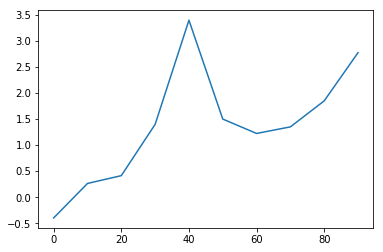

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot()
plt.show()

### Data Frame



DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically. 

<code>df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns = [‘A’,’B’, ‘C’, ‘D’], index = np.arange(0, 100, 10))
</code>
	
* subplots : Plot each DataFrame column in a separate subplot
* sharex : if subplots = True, share the same x-axis, linking ticks and limits
* sharey : if subplots = True, share the same y-axis.
* figsize : Size of figure to create as tuple
* title : Plot title as string
* legend : Add a subplot legend(True by default)
* sort_columns : Plot columns in alphabetical order, by default uses existing column order.


### Bar Plots


The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. In this case, the Series and DataFrame index will be used as the x(bar) or y(barh) ticks. 



The options color = ‘k’ and alpha = 0.7 set the color of the plots to black and use partial transparency on the filling.

With a DataFrame, bar plots group values in each row together in a group in bars, side by side, for each value.

We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together.


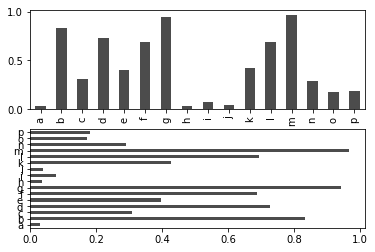

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index = list ('abcdefghijklmnop'))

data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)

data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)

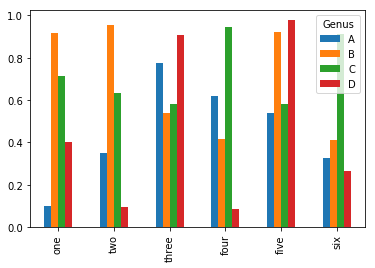

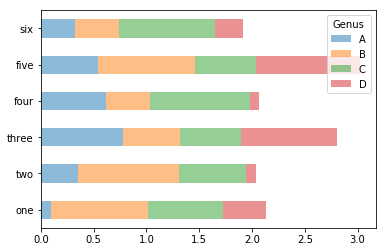

In [7]:
df = pd.DataFrame(np.random.rand(6,4), index = ['one', 'two', 'three', 'four', 'five', 'six'], columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df.plot.bar() # Groups the values
df.plot.barh(stacked = True, alpha = 0.5) # Stacks each row


### Histogram Plots

A histogram is a kind of a bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 


(array([ 10.,  21.,  54., 131., 188., 234., 179., 103.,  61.,  19.]),
 array([-3.0762417 , -2.49956696, -1.92289222, -1.34621748, -0.76954275,
        -0.19286801,  0.38380673,  0.96048147,  1.53715621,  2.11383095,
         2.69050569]),
 <a list of 10 Patch objects>)

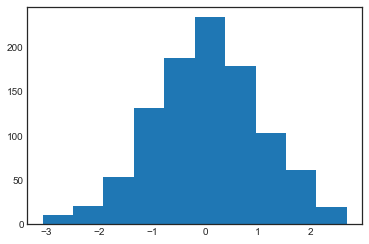

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)
plt.hist(data)


The method used here is, plot.hist() and it has many options to tune both the calculation and the display; here is an example of a more customized histogram

(array([ 2.,  2.,  6.,  4.,  9.,  8., 12., 21., 21., 29., 41., 61., 52.,
        73., 63., 75., 79., 80., 62., 61., 56., 42., 37., 24., 30., 23.,
         8.,  8.,  7.,  4.]),
 array([-3.07624170e+00, -2.88401679e+00, -2.69179187e+00, -2.49956696e+00,
        -2.30734205e+00, -2.11511713e+00, -1.92289222e+00, -1.73066731e+00,
        -1.53844240e+00, -1.34621748e+00, -1.15399257e+00, -9.61767658e-01,
        -7.69542745e-01, -5.77317832e-01, -3.85092920e-01, -1.92868007e-01,
        -6.43093928e-04,  1.91581819e-01,  3.83806732e-01,  5.76031645e-01,
         7.68256557e-01,  9.60481470e-01,  1.15270638e+00,  1.34493130e+00,
         1.53715621e+00,  1.72938112e+00,  1.92160603e+00,  2.11383095e+00,
         2.30605586e+00,  2.49828077e+00,  2.69050569e+00]),
 <a list of 1 Patch objects>)

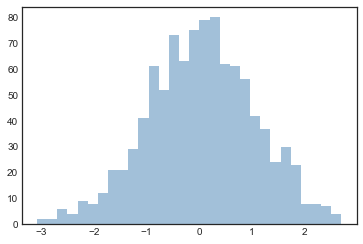

In [9]:
plt.hist(data, bins = 30, alpha = 0.5, histtype = 'stepfilled', color = 'steelblue', edgecolor = 'none')

Histogram can be 1D, 2D, and 2D histogram creates a tessellation of squares across the axes. Another natural shape for such a tessellation is the regular hexagon. For this purpose, Matplotlib provides the plt.hexbin routine, which represents a 2D dataset binned within a grid of hexagons.

### Density Plots 

A density plot which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels” - that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using the conventional mixture- of- normals estimate. The method used here is, plot.density()

Seaborn makes histogram and density plots even easier through its distplot method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, let us consider a bimodal distribution consisting of draws from two different standard normal distributions:


C:\Users\ra407452\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


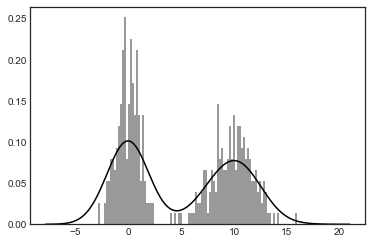

In [10]:
import seaborn as sns
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k')


# Contour Plots 
Sometimes it is useful to display 3D data on 2D using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: plt.contour for contour plots, plt.contourf for filled contour plots and plt.imshow for showing images. We will start by demonstrating a contour plot using function z=f(x,y), using the following particular choice for ** f **


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def f(x, y): 
    return np.sin(x) ** 10 + np.cos(10+y*x) * np.cos(x)


A contour plot can be created with plt.contour function and np.meshgrid function is used to build 2D grids from 1D arrays.

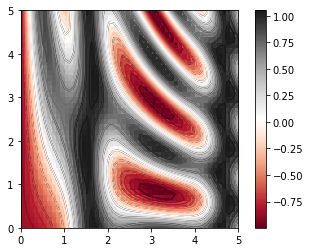

In [7]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors = 'black');
plt.contour(X, Y, Z, 20, cmap = 'RdGy')
plt.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdGy')
plt.colorbar();


We chose RdGy - short form of Red Gray colormap, which is a good choice for centered data. <br>
plt.colorbar(), which automatically creates an additional axis with labeled color information for the plot. <br>
plt.imshow(), by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. 

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. 
For example, 

In [9]:
macro = pd.read_csv('../Data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn’s regplot method, which makes a scatter plot and fits a linear regression line



Text(0.5,1,'Changes in log m1 versus log unemp')

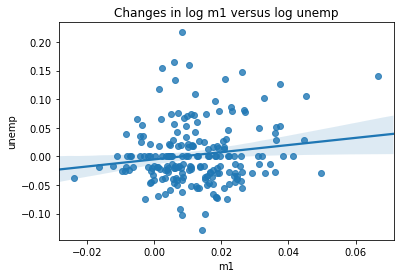

In [10]:
import seaborn as sns
sns.regplot('m1', 'unemp', data = trans_data)
plt.title('Changes in log %s versus log %s' %('m1', 'unemp'))

In exploratory data analysis, it is helpful to be able to look at all the scatter plots among a group of variables, this is known as pairs plot or scatter plot matrix. Making such a plot from scratch is a bit of work, there are inbuilt libraries like seaborn, has convenient pari plot function, which supports placing histograms or density estimates of each variable along the diagonal. For these pair plots, there is also plots_kws argument that enables to pass down configuration options to the individual plotting calls on the off-diagonal elements. More granular configuration options are available on seaborn.pairplot docstring. 

### Facets and Categorical Data

One way to visualize data with many categorical variables is to use a facet grid. Seaborn has a useful built-in function factorplot that simplifies making many kinds of faceted plots.


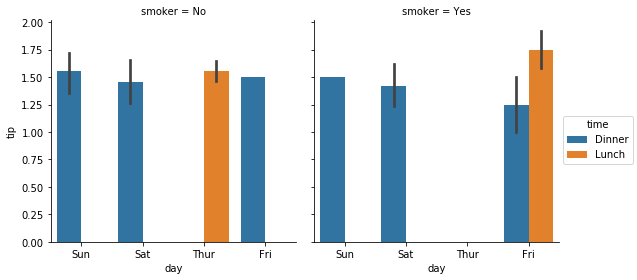

In [12]:
import pandas as pd
import seaborn as sns

tips = pd.read_csv('../Data/tips.csv')
sns.factorplot(x= 'day', y= 'tip', hue = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip < 2])

Instead of grouping by ‘time’ by different bar colors within a facet, we can also expand the facet grid by adding one row per time value. 

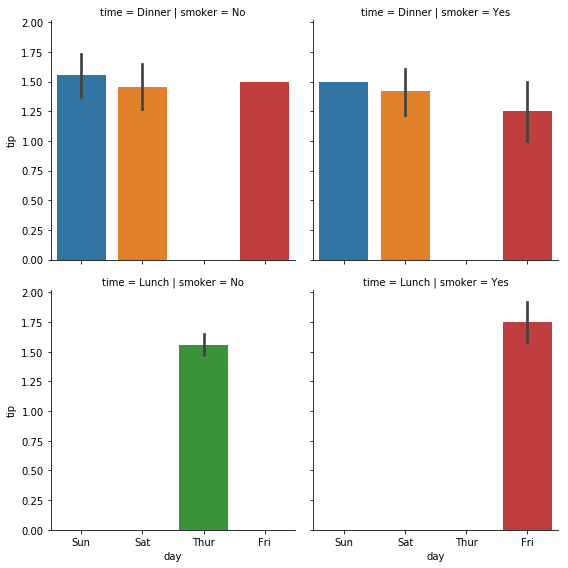

In [13]:
sns.factorplot( x= 'day', y = 'tip', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip < 2])

Factorplot supports other plot types that may be useful depending on what we are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be effective visualization type.

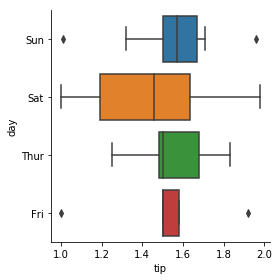

In [14]:
sns.factorplot(x='tip', y='day', kind='box', data = tips[tips.tip < 2])

## Visualization of Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.

A basic errorbar can be created with single Matplotlib function call:


<ErrorbarContainer object of 3 artists>

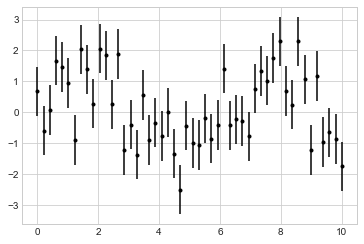

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x= np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy *np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt = '.k')


Here the fmt is a format code controlling the appearance of lines and points. In addition to these basic options, the errorbar function has many options to fine tune the outputs. Using these additional options we can easily customize the aesthetics of error plot, especially when the data is too crowded.

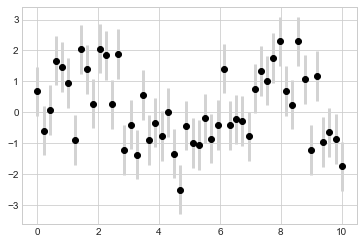

In [16]:
plt.errorbar(x, y, yerr = dy, fmt ='o', color = 'black', ecolor = 'lightgray', elinewidth = 3, capsize = 0);

### Continuous Errors 
In some situations it is desirable to show errorbars on continuous quantities. We will perform a “Simple Gaussian Regression(GPR)”, using the Scikit-Learn API. This is a method of fitting a very flexible nonparametric function to data with a continuous measure for the uncertainty. Scikit-Learn is a python library, that is characterized by a clean, uniform, and streamlines API, and it provides efficient versions of a large number of common as well as machine learning algorithms. We will not delve into the details of Gaussian process regression, but will focus on visualization of continuous error.


Text(0.5,1,'Initial: 1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1)\nOptimum: 0.00316**2 * RBF(length_scale=109) + WhiteKernel(noise_level=0.637)\nLog-Marginal-Likelihood: -23.87233736198489')

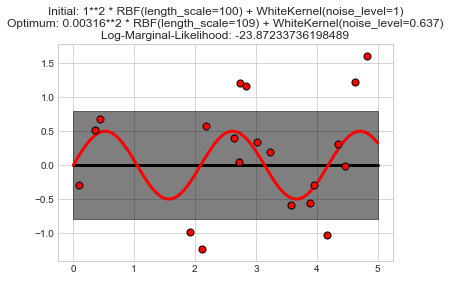

In [17]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))


Now, we have xfit, yfit and dyfit, which sample the continuous fit to our data. To visualize continuous error we can use plt.fill_between function

